In [2]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.core.display import HTML, display
from time import time

In [12]:
fig, ax = plt.subplots()
def draw_frame(frame_num):
    #print("Debug")
    ax.cla()
    ax.text(0.5, 0.5, frame_num, size=72, va="center", ha="center")
anim = FuncAnimation(fig, draw_frame, frames=10)
#with open("out.html","w"):
#    f.write(anim.to_html5_video())
#HTML("<h1>hi</h1>")
html =anim.to_html5_video()
plt.close(fig)
HTML(html)

In [17]:
fig, ax = plt.subplots()
#option2
txt = ax.text(0.5, 0.5, "", size=72, va="center", ha="center")
def draw_frame(frame_num):
    txt.set_text(str(frame_num))
    
anim = FuncAnimation(fig, draw_frame, frames=10, interval=1000)#1 second interval
html =anim.to_html5_video()
plt.close(fig)
HTML(html)

In [23]:
fig, ax = plt.subplots(figsize=(6,6))

circ = plt.Circle((0, 0), 0.1, facecolor="red", zorder=3)
ax.add_artist(circ)
rect = plt.Rectangle((0, 0.3), 1, 0.1, facecolor="black", zorder=2)
ax.add_artist(rect)

def draw_frame(frame_num):
    circ.center = (0.5, 1-frame_num/100)

anim = FuncAnimation(fig, draw_frame, frames=100, interval=25)
t0 = time()
html = anim.to_html5_video()
t1 = time()
print("Seconds to generate:", t1-t0)
plt.close(fig)
HTML(html)

Seconds to generate: 6.51013708114624


In [31]:
fig, ax = plt.subplots(figsize=(6,6))

circ = plt.Circle((0, 0), 0.1, facecolor="red", zorder=3)
ax.add_artist(circ)
rect = plt.Rectangle((0, 0.3), 1, 0.1, facecolor="black", zorder=2)
ax.add_artist(rect)

second = 2
fps = 50 #frame-per second
frame_count = int(fps*second)

def draw_frame(frame_num):
    percent = frame_num / frame_count
    circ.center = (0.5, 1-percent)

debug_frame = None
if debug_frame != None:
    draw_frame(debug_frame)
else:
    anim = FuncAnimation(fig, draw_frame, frames=frame_count, interval=1000/fps)
    t0 = time()
    html = anim.to_html5_video()
    t1 = time()
    print("Seconds to generate:", t1-t0)
    plt.close(fig)
    display(HTML(html))

Seconds to generate: 4.884424448013306


In [32]:
fig, ax = plt.subplots(figsize=(6,6))

circ = plt.Circle((0, 0), 0.1, facecolor="red", zorder=3)
ax.add_artist(circ)
rect = plt.Rectangle((0, 0.3), 1, 0.1, facecolor="black", zorder=2)
ax.add_artist(rect)

seconds = 2
fps = 100 # frames-per second
frame_count = fps*seconds

def draw_frame(frame_num):
    percent = frame_num / frame_count
    if percent < 0.5:
        y = 1-percent
    else:
        y = percent
    circ.center = (0.5, y)

debug_frame = None    

if debug_frame != None:
    draw_frame(debug_frame)
else:
    anim = FuncAnimation(fig, draw_frame, frames=frame_count, interval=1000/fps)
    t0 = time()
    html = anim.to_html5_video()
    t1 = time()
    print("Seconds to generate:", t1-t0)
    plt.close(fig)
    display(HTML(html))

Seconds to generate: 9.663220643997192


In [49]:
import pandas as pd
from datetime import timedelta, datetime, date

In [35]:
df = pd.read_csv("crime.csv")[["IncidentDate", "Address"]]
df.head()

,IncidentDate,Address
0,2005-10-07T03:33:00.000Z,700 Block of E. Washington Ave. ...
1,2005-03-03T05:42:00.000Z,First St & E Washington Ave ...
2,2005-03-02T14:30:00.000Z,8 New Berm Court ...
3,2005-03-03T13:30:00.000Z,4300 Lumley Rd ...
4,2005-03-04T19:45:00.000Z,211 S. Carroll Street ...


In [39]:
 df["IncidentDate"]=pd.to_datetime(df["IncidentDate"])

In [45]:
df["date"]=df["IncidentDate"].dt.date
df.head()

,IncidentDate,Address,date
0,2005-10-07 03:33:00+00:00,700 Block of E. Washington Ave. ...,2005-10-07
1,2005-03-03 05:42:00+00:00,First St & E Washington Ave ...,2005-03-03
2,2005-03-02 14:30:00+00:00,8 New Berm Court ...,2005-03-02
3,2005-03-03 13:30:00+00:00,4300 Lumley Rd ...,2005-03-03
4,2005-03-04 19:45:00+00:00,211 S. Carroll Street ...,2005-03-04


In [52]:
s = df["IncidentDate"]-df["IncidentDate"].dt.floor("d")
s.iloc[0]/ timedelta(days=1)

0.14791666666666667

In [55]:
df["percent"] = (df["IncidentDate"]-df["IncidentDate"].dt.floor("d"))/timedelta(days=1)
df.head()

,IncidentDate,Address,date,percent
0,2005-10-07 03:33:00+00:00,700 Block of E. Washington Ave. ...,2005-10-07,0.147917
1,2005-03-03 05:42:00+00:00,First St & E Washington Ave ...,2005-03-03,0.237500
2,2005-03-02 14:30:00+00:00,8 New Berm Court ...,2005-03-02,0.604167
3,2005-03-03 13:30:00+00:00,4300 Lumley Rd ...,2005-03-03,0.562500
4,2005-03-04 19:45:00+00:00,211 S. Carroll Street ...,2005-03-04,0.822917


In [56]:
df["date"].value_counts()

2008-10-12    11
2011-07-10    10
2011-10-30    10
2011-06-11    10
2010-05-02    10
              ..
2006-01-17     1
2017-03-23     1
2014-11-07     1
2019-11-08     1
2018-10-19     1
Name: date, Length: 4809, dtype: int64

In [59]:
df = df[df["date"] == date(2008,10,12)].copy()
df

,IncidentDate,Address,date,percent
996,2008-10-12 04:26:00+00:00,3019 E. Washington Ave.,2008-10-12,0.184722
997,2008-10-12 08:00:00+00:00,4300 Doncaster Dr,2008-10-12,0.333333
998,2008-10-12 08:00:00+00:00,500 State St.,2008-10-12,0.333333
999,2008-10-12 06:30:00+00:00,123 E. Doty St.,2008-10-12,0.270833
1000,2008-10-12 07:10:00+00:00,400 Block N. Henry St.,2008-10-12,0.298611
1001,2008-10-12 05:27:00+00:00,500 N. Lake St.,2008-10-12,0.227083
1003,2008-10-12 02:24:00+00:00,E. Johnson Street @ Pinckney Street,2008-10-12,0.100000
1008,2008-10-12 23:31:00+00:00,1600 block Troy Drive,2008-10-12,0.979861
1009,2008-10-12 05:06:00+00:00,600 block of State Street,2008-10-12,0.212500
1011,2008-10-12 05:06:00+00:00,100 block South Randall Avenue,2008-10-12,0.212500


/usr/lib/python3/dist-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.25.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


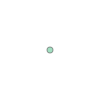

In [4]:
from shapely.geometry import Point
import requests

def get_api_key():
    with open("secret-key.txt") as f:
        return f.read().strip()
    
def get_loc(addr):
    addr += "Madison WI"
    addr = addr.replace(" ","+")#simple URL encoding
    url = "https://maps.googleapis.com/maps/api/geocode/json?address={}&key={}"
    url = url.format(addr, get_api_key())
    #print(url)
    r = requests.get(url)#payu each time this line runs!
    r.raise_for_status()
    coord = r.json()["results"][0]['geometry']["location"]
    return Point(coord['lng'], coord['lat'])

get_loc("500 State St.")

In [84]:
df["geometry"] = None
for idx in df.index:
    addr = df.loc[idx,"Address"]
    pt = get_loc(addr)
    print(pt)
    df.loc[idx,"geometry"] = pt
df.head()

POINT (-89.3419911 43.1037753)
POINT (-89.44864729999999 43.0361164)
POINT (-89.3934697 43.074861)
POINT (-89.38006469999999 43.0743762)
POINT (-89.39078479999999 43.0754426)
POINT (-89.3973586 43.07490440000001)
POINT (-89.3858084 43.0776684)
POINT (-89.3681079 43.1336856)
POINT (-89.39539409999999 43.07490139999999)
POINT (-89.40900069999999 43.0666563)
POINT (-89.3686421 43.1245979)


,IncidentDate,Address,date,percent,geometry
996,2008-10-12 04:26:00+00:00,3019 E. Washington Ave.,2008-10-12,0.184722,POINT (-89.3419911 43.1037753)
997,2008-10-12 08:00:00+00:00,4300 Doncaster Dr,2008-10-12,0.333333,POINT (-89.44864729999999 43.0361164)
998,2008-10-12 08:00:00+00:00,500 State St.,2008-10-12,0.333333,POINT (-89.3934697 43.074861)
999,2008-10-12 06:30:00+00:00,123 E. Doty St.,2008-10-12,0.270833,POINT (-89.38006469999999 43.0743762)
1000,2008-10-12 07:10:00+00:00,400 Block N. Henry St.,2008-10-12,0.298611,POINT (-89.39078479999999 43.0754426)


In [6]:
import geopandas
gdf = geopandas.GeoDataFrame(df)
gdf.geometry

NameError: name 'df' is not defined

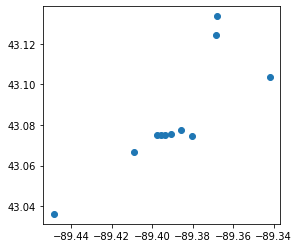

In [87]:
gdf.plot()

In [93]:
gdf[["percent","geometry"]].to_file("crime.shp")

In [7]:
fig, ax = plt.subplots(figsize=(6,6))

city = geopandas.read_file('zip://city.zip')
water = geopandas.read_file('zip://water.zip')
crime = geopandas.read_file('crime.shp')
city.plot(ax=ax, color='0.85')
water.plot(ax=ax, color='lightblue')
#list of marker and percent
markers =[]
for idx, row in crime.iterrows():
    pt = row['geometry']
    mkr = ax.plot(pt.x,pt.y,'ro')[0]
    markers.append((mkr,row['percent']))
#print(markers)

seconds = 12
fps = 20 #frame-per second
frame_count = int(fps*seconds)

def draw_frame(frame_num):
    percent = frame_num / frame_count
    for mkr,mkr_perc in markers:
        if percent > mkr_perc:
            elapsed_time = (percent - mkr_perc) / 0.1
            alpha = max(1 - elapsed_time, 0)
            #make disappear slowly
        else:
            alpha= 0
        mkr.set_alpha(alpha)#set alpha here

debug_frame = None
if debug_frame != None:
    draw_frame(debug_frame)
else:
    anim = FuncAnimation(fig, draw_frame, frames=frame_count, interval=1000/fps)
    t0 = time()
    html = anim.to_html5_video()
    t1 = time()
    print("Seconds to generate:", t1-t0)
    plt.close(fig)
    display(HTML(html))

Seconds to generate: 21.940460443496704
